## **1. About the project:**



Exploring AI's impact, ChatGPT consistently rises above the rest. This project, a journey to collect and analyze 500,000 tweets about ChatGPT, deepens understanding of the data science pipeline and involves data collection from scratch. 

Learn about the collection process in "Effortlessly Scraping Massive Twitter Data" [link to Medium article]


Access the dataset on Kaggle: [Kaggle link].


With Twitter buzz about conversational Large Language Models, the data from **January 4th to March 29th, 2023**, offers ample opportunities to observe trends. This analysis covers data cleaning, visualization, topic modeling, tech stock impact, influential users, and sentiment analysis. Unveiling public opinion and ChatGPT's benefits, this project sheds light on ChatGPT's role in shaping the future of AI-powered conversational technologies. Let's dive in!








## **2. Dataset & Data Collection**

**Dataset:**  

Find the dataset on Kaggle: [Kaggle link]


*   **January 4th 2023 to March 29th 2023**
*   **Columns:** `date, 	id, 	content, 	username, like_count, retweet_count` 


To find out how I scraped this dataset using **Snscrape**, follow my guide on Medium "Effortlessly Scraping Massive Twitter Data with snscrape" [I'll share a link soon]

The data consists of 500k Tweets on ChatGPT from January to March 2023

I've already scraped 500k tweets which took above 7 hours on Google Colab.

## **3. Install and import libraries and modules**

In [1]:
!pip install wordcloud
!pip install TextBlob
!pip install chart-studio
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import chart_studio
import re
import string
import collections
import ipywidgets
import cufflinks
import nltk.tokenize

import pandas as pd
import datetime
import seaborn as sns
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import nltk
import gensim
import yfinance as yf

from textblob import TextBlob
from google.colab import widgets
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from tqdm.notebook import tqdm
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **4. Importing the data** 




Import the dataset as per your dataset path and filename

In [5]:
tweet_df = pd.read_csv('/content/my_data_500k.csv')

## **5. Understanding the Dataset**

In [6]:
#I'll create a copy of my dataframe, just incase I mess it up :p
df = tweet_df.copy(deep = True)

In [7]:
df.head()

date                   id  \
0  2023-03-29 22:58:21+00:00  1641213230730051584   
1  2023-03-29 22:58:18+00:00  1641213218520481805   
2  2023-03-29 22:57:53+00:00  1641213115684536323   
3  2023-03-29 22:57:52+00:00  1641213110915571715   
4  2023-03-29 22:57:26+00:00  1641213003260633088   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   
1           @MecoleHardman4 Chat GPT says it’s 15. 😂    AmyLouWho321   
2  https://t.co/FjJSprt0te - Chat with any PDF!\n...      yjleon1976   
3  AI muses: "In the court of life, we must all f...  ChatGPT_Thinks   
4  Most people haven't heard of Chat GPT yet.\nFi...   nikocosmonaut   

   like_count  retweet_count  
0         0.0            0.0  
1         0.0            0.0  
2         0.0            0.0  
3         0.0            0.0  
4         0.0            0.0

In [8]:
print("Length: ",len(tweet_df))
print("Shape: ",df.shape)

Length:  500036
Shape:  (500036, 6)


In [9]:
# Descriptive statistics on likes and retweets
print(df[['like_count', 'retweet_count']].describe())

          like_count  retweet_count
count  499974.000000  499974.000000
mean        7.123208       1.481523
std       216.366469      46.254101
min         0.000000       0.000000
25%         0.000000       0.000000
50%         1.000000       0.000000
75%         2.000000       0.000000
max     64094.000000   16080.000000


In [10]:
# Checking the number of unique values in each column
for col in df.columns:
    print(col, ":", df[col].nunique())

date : 475394
id : 500007
content : 493744
username : 250006
like_count : 1066
retweet_count : 489


In [11]:
#Average tweet length
count = 0
for i in df['content']:
    count += len(''.join(str(i).split()))

avg_tweet_length = count / len(df['content'])

print("Average Tweet length is:", avg_tweet_length)

Average Tweet length is: 142.63451831468134


## **6. Data Preprocessing**

### **Preprocessing 1.1:** 

1.   Drop Null values, date column values to datetime objects
2.   Remove links, #, @  and unwanted characters




In [12]:
# check for missing values
print(df.isnull().sum())

date              0
id                6
content           6
username         34
like_count       62
retweet_count    62
dtype: int64


In [13]:
# Remove missing values
df = df.dropna()
print("Length: ",len(df))

Length:  499974


At the moment we are only interested in the Date information of Date column, so we'll remove the time component of it

In [14]:
# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract the date component and assign it to the 'date' column
df['date'] = df['date'].dt.date

# again convert this extraced component to datetime object
df['date'] = pd.to_datetime(df['date'])

In [15]:
# Just to make sure
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  
0         0.0            0.0

In [16]:
# Checking range of dates
print("Start Date: " ,df['date'].min())
print("End Date: " ,df['date'].max())

Start Date:  2023-01-04 00:00:00
End Date:  2023-03-29 00:00:00


That's 3 months (almost)

In [17]:
# Checking the number of unique values in each column
for col in df.columns:
    print(col, ":", df[col].nunique())

date : 85
id : 499974
content : 493705
username : 249998
like_count : 1066
retweet_count : 489


In [18]:
# One preprocessing function to rule them all(almost!)
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)

    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    # text = re.sub(r'@\w+', lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.group(0)), text) #Keeps the character trailing @
    # text = re.sub(r'#\w+', lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.group(0)), text) #Keeps the character trailing #

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    return text

In [19]:
df['processed_content'] = df['content'].apply(pre_process)

In [20]:
# Checking the number of unique values in each column
for col in df.columns:
    print(col, ":", df[col].nunique())

date : 85
id : 499974
content : 493705
username : 249998
like_count : 1066
retweet_count : 489
processed_content : 458210




---



---



### **Preprocessing 1.2:**

Removing Duplicates, Spam, Redundency



#### **1.2.1 Understanding the repetition and duplicates**

In [21]:
# Value counts for the 'content' column
content_counts = df['content'].value_counts()
print("Top 10 most frequent tweets in 'content':")
print("\n")
print(content_counts.head(20))
print("\n")
print("\n")
# Value counts for the 'preprocessed_content' column
preprocessed_content_counts = df['processed_content'].value_counts()
print("Top 10 most frequent tweets in 'preprocessed_content':")
print('\n')
print(preprocessed_content_counts.head(20))


Top 10 most frequent tweets in 'content':


Chat GPT                                                                                                                                                                                                                                                                             126
@themattmic Chat GPT                                                                                                                                                                                                                                                                 121
@Timtwttt Chat GPT                                                                                                                                                                                                                                                                    84
te amo chat gpt                                                                                                  

#### **1.2.2 Removing duplicates, spam, redundency**



So here's the thing!
*   original content count : 499974
*   unique content : 493705
*   unique processed_content : 458210

It's a good idea to start the analysis with the DataFrame containing unique preprocessed content (458,210 tweets) to focus on unique insights and reduce the impact of noise or repeated content.

In [22]:
df.head()

date                   id  \
0 2023-03-29  1641213230730051584   
1 2023-03-29  1641213218520481805   
2 2023-03-29  1641213115684536323   
3 2023-03-29  1641213110915571715   
4 2023-03-29  1641213003260633088   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   
1           @MecoleHardman4 Chat GPT says it’s 15. 😂    AmyLouWho321   
2  https://t.co/FjJSprt0te - Chat with any PDF!\n...      yjleon1976   
3  AI muses: "In the court of life, we must all f...  ChatGPT_Thinks   
4  Most people haven't heard of Chat GPT yet.\nFi...   nikocosmonaut   

   like_count  retweet_count  \
0         0.0            0.0   
1         0.0            0.0   
2         0.0            0.0   
3         0.0            0.0   
4         0.0            0.0   

                                   processed_content  
0  free ai marketing and automation tools, strate...  
1                           chat gpt says it’s 15. 😂  
2   - chat with any pdf! check out how this new a...  
3  ai muses: "in the court of life, we must all f...  
4  most people haven't heard of chat gpt yet. fir...

In [23]:
#I'll make a copy of our dataframe before removing the duplicate values based on 'preprocessed_content' column
df_backup = df.copy(deep=True)

We'll only keep the copies ones with the highest engagement (like_count), we'll 
1. sort the dataframe based on the engagement metric  
2. drop duplicates based on 'processed_content'
3. sort the dataframe again based on index

In [24]:
# Sort dataframe by like_count, highest to lowest
df_sorted = df.sort_values(by='like_count', ascending=False)
# Only keep first copy of the tweet (with highes likes)
df_cleaned = df_sorted.drop_duplicates(subset='processed_content', keep='first')
# Sort dataframe by index
df_final = df_cleaned.sort_index()

In [25]:
df = df_final

In [26]:
print("Length of Dataframe: ",len(df))

Length of Dataframe:  458210


In [27]:
df.columns

Index(['date', 'id', 'content', 'username', 'like_count', 'retweet_count',
       'processed_content'],
      dtype='object')

This makes the length of our dataframe **458210 from nearly 500k**. A lot of redundency and repeated content. Remember there are always pros and cons of these steps but here pros outweight the cons for our analysis



---


---





## **7. Topic Modeling LDA** - on top 10000 most liked tweets

Hidden topics and themes

7.1 Topic Modeling - LDA

In [ ]:
# Let's sort the dataframe and get top 10000 most liked tweets
df_sorted = df.sort_values(by='like_count', ascending=False)
df_top_10000 = df_sorted.iloc[:10000]

In [ ]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
docs = df_top_10000['processed_content'].apply(lambda x: [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])

In [ ]:
# Create a dictionary of words and their frequency
dictionary = corpora.Dictionary(docs)

In [ ]:
# Create a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [ ]:
# Topic modeling using LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [ ]:
# Print the topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    print('\n')

Topic: 0 
Words: 0.054*"like" + 0.038*"using" + 0.036*"know" + 0.026*"make" + 0.023*"people" + 0.021*"google" + 0.020*"need" + 0.018*"student" + 0.017*"u" + 0.015*"even"


Topic: 1 
Words: 0.061*"asked" + 0.051*"write" + 0.045*"get" + 0.025*"answer" + 0.024*"question" + 0.023*"future" + 0.023*"today" + 0.022*"ask" + 0.020*"help" + 0.017*"check"


Topic: 2 
Words: 0.115*"chatgpt" + 0.030*"model" + 0.029*"think" + 0.024*"see" + 0.023*"openai" + 0.021*"say" + 0.017*"video" + 0.017*"many" + 0.016*"everyone" + 0.013*"api"


Topic: 3 
Words: 0.039*"much" + 0.027*"learn" + 0.023*"result" + 0.022*"word" + 0.020*"version" + 0.019*"link" + 0.018*"microsoft" + 0.018*"large" + 0.016*"company" + 0.016*"two"


Topic: 4 
Words: 0.025*"data" + 0.025*"technology" + 0.024*"let" + 0.023*"week" + 0.021*"next" + 0.018*"chatbot" + 0.016*"game" + 0.014*"coming" + 0.014*"project" + 0.014*"style"


Topic: 5 
Words: 0.059*"response" + 0.047*"read" + 0.035*"said" + 0.034*"real" + 0.033*"interesting" + 0.025*"abl

## **8.1 EDA 1 - Timeline, Trends, Popularity**

### 8.1.1 Relationship: Likes and Retweets

 

Scatter Plot with Ordinary Least Squares Regression line

In [28]:
# Define the maximum thresholds for like count and retweet count
max_like_count = 2000
max_retweet_count = 500

# Filter the DataFrame to include only rows where like_count and retweet_count are below the thresholds
df_filtered = df[(df['like_count'] <= max_like_count) & (df['retweet_count'] <= max_retweet_count)]

In [32]:
# # Scatter plot of likes vs. retweets
# fig = px.scatter(df_filtered, x='like_count', y='retweet_count', trendline="ols", trendline_color_override="red")
# fig.update_layout(title='Likes vs. Retweets', xaxis_title='Likes', yaxis_title='Retweets', height=800, width=1200)
# fig.show()

<Axes: xlabel='like_count', ylabel='retweet_count'>

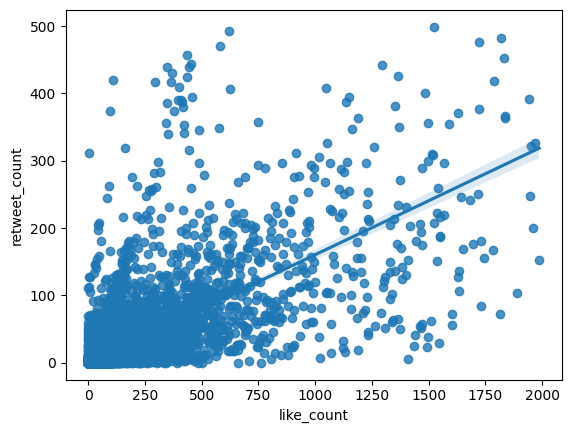

In [30]:
# Static plot

# Regression plot to understand the relationship between likes and retweets
sns.regplot(x='like_count', y='retweet_count', data=df_filtered)

In [31]:
correlation = df['like_count'].corr(df['retweet_count'])
print("Pearson correlation coefficient between likes and retweets:", correlation)

Pearson correlation coefficient between likes and retweets: 0.7311855334622016



### 8.1.2 Timeline Analysis
[ChatGPT Timeline](https://timelines.issarice.com/wiki/Timeline_of_ChatGPT)





**`a. Tweets/day - Three month(Jan,Feb,Mar) timeline  `**

In [33]:
# Set seaborn style
sns.set_style('darkgrid')

In [34]:
# Dates with highest tweet counts
top_tweet_dates = df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(top_tweet_dates.head(10))

         date  count
70 2023-03-15  10841
34 2023-02-07  10244
71 2023-03-16   8946
35 2023-02-08   8559
79 2023-03-24   8008
72 2023-03-17   7966
69 2023-03-14   7884
76 2023-03-21   7499
83 2023-03-28   7467
36 2023-02-09   7367


In [35]:
# # Number of tweets per day
# tweets_by_day = df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index()
# tweets_by_day.columns = ['date', 'count']
# fig2 = px.bar(tweets_by_day, x='date', y='count', title='Number of Tweets per Day', color = 'count', height=800, width=1500)
# fig2.update_xaxes(tickangle=45, tickformat='%Y-%m-%d')
# fig2.show()

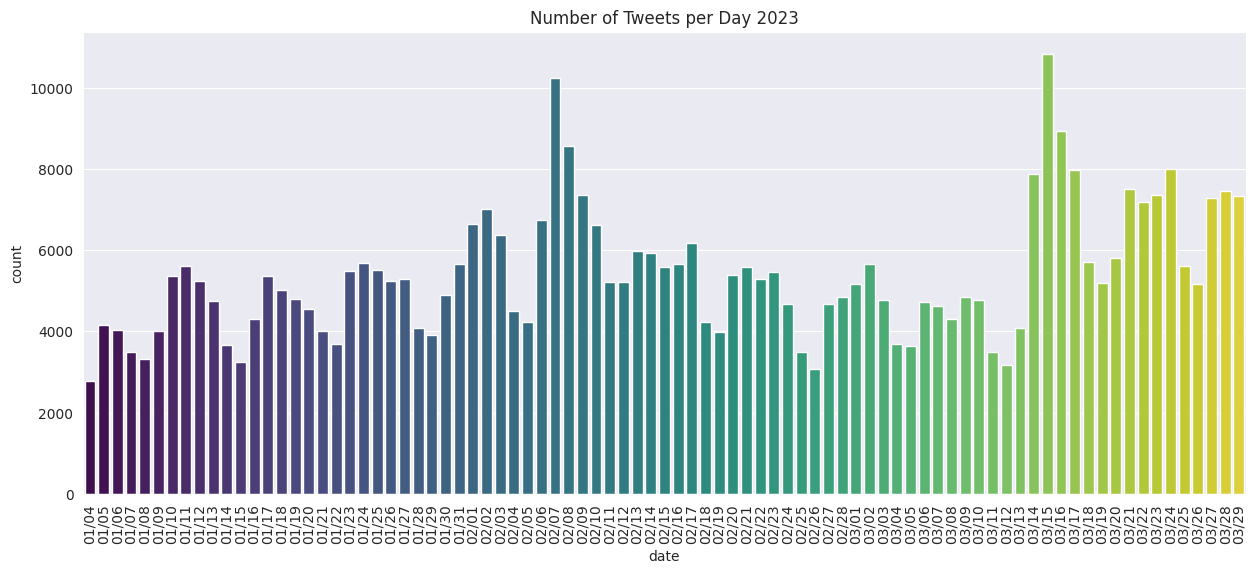

In [36]:
# Static Day

tweets_by_day = df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index()
tweets_by_day.columns = ['date', 'count']
tweets_by_day['date'] = tweets_by_day['date'].dt.strftime('%m/%d')
plt.figure(figsize=(15, 6))
sns.barplot(data=tweets_by_day, x='date', y='count', palette='viridis')
plt.title('Number of Tweets per Day 2023')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  \
0         0.0            0.0   

                                   processed_content  
0  free ai marketing and automation tools, strate...

**`b. Tweets/week & Tweets/month`**

In [38]:
# # Number of tweets per week (bar plot)
# tweets_by_week = df.groupby(pd.Grouper(key='date', freq='W-MON',label='left')).size().reset_index()
# tweets_by_week.columns = ['week', 'count']
# tweets_by_week['week_start'] = tweets_by_week['week'].dt.strftime('%Y-%m-%d')
# tweets_by_week['week_end'] = (tweets_by_week['week'] + pd.Timedelta(days=6)).dt.strftime('%Y-%m-%d')
# fig = px.bar(tweets_by_week, x='week_start', y='count', title='Number of Tweets per Week', height=400, width=800, color = 'count')
# fig.update_xaxes(tickangle=45)
# fig.show()

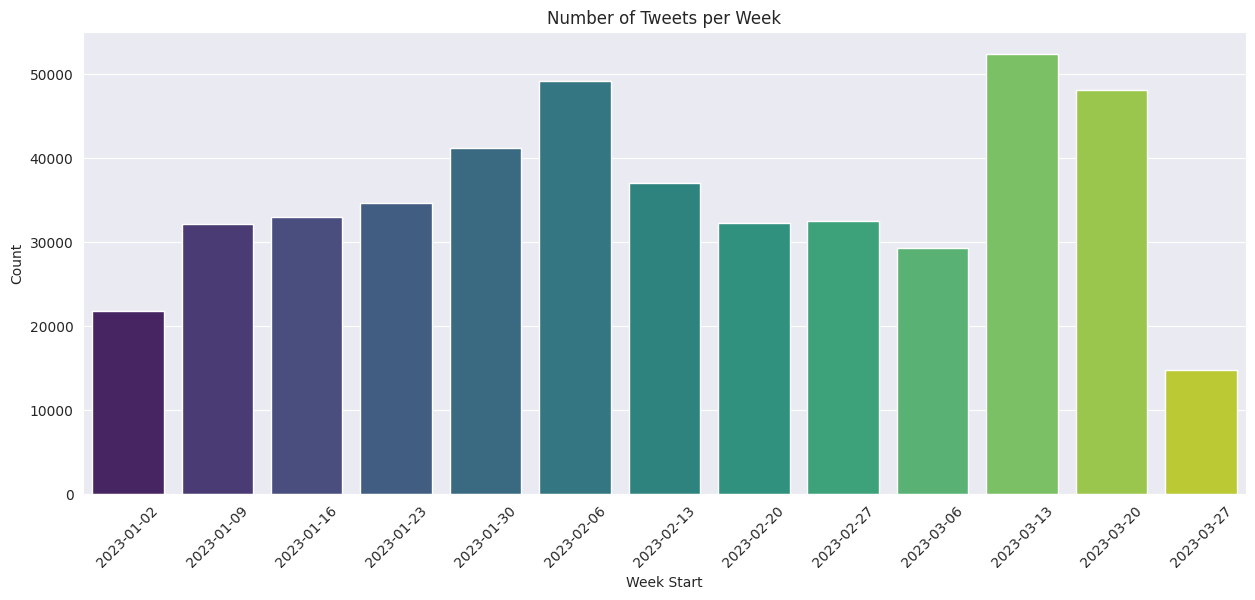

In [37]:
# Static Week

# Number of tweets per week (bar plot)
tweets_by_week = df.groupby(pd.Grouper(key='date', freq='W-MON',label='left')).size().reset_index()
tweets_by_week.columns = ['week', 'count']
tweets_by_week['week_start'] = tweets_by_week['week'].dt.strftime('%Y-%m-%d')
tweets_by_week['week_end'] = (tweets_by_week['week'] + pd.Timedelta(days=6)).dt.strftime('%Y-%m-%d')

plt.figure(figsize=(15, 6))
sns.barplot(data=tweets_by_week, x='week_start', y='count', palette='viridis')
plt.title('Number of Tweets per Week')
plt.xticks(rotation=45)
plt.xlabel('Week Start')
plt.ylabel('Count')
plt.show()

In [39]:
# tweets_by_month = df.groupby(pd.Grouper(key='date', freq='M',label='left')).size().reset_index(name='count')
# fig = px.bar(tweets_by_month, x='date', y='count', title='Number of Tweets by Month', height=400, width=400, color = 'count')
# fig.update_xaxes(title_text='Month')
# fig.update_yaxes(title_text='Count')
# fig.show()

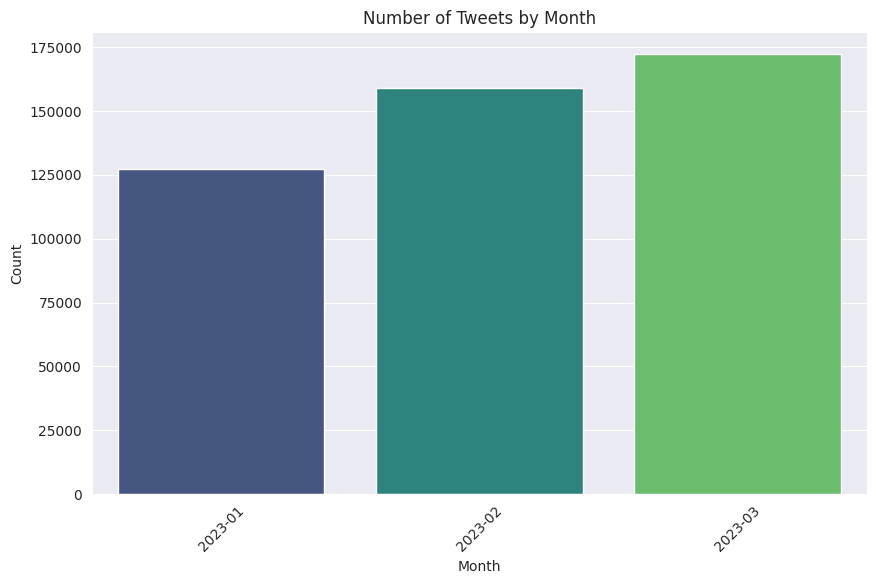

In [40]:
# Static Month

tweets_by_month = df.groupby(pd.Grouper(key='date', freq='M')).size().reset_index(name='count')
tweets_by_month['month'] = tweets_by_month['date'].dt.strftime('%Y-%m')

plt.figure(figsize=(10, 6))
sns.barplot(data=tweets_by_month, x='month', y='count', palette='viridis')
plt.title('Number of Tweets by Month')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()




---



---



---




## **8.2 EDA 2 - Top #Hashtag @mention and usernames**

We'll remove #ChatGPT from the list as it's an obvious one

In [42]:
# # Most used hashtags apart from #ChatGPT
# hashtags = df['content'].str.findall(r'#\w+')
# hashtags_count = hashtags.explode().value_counts()
# fig_hashtags = px.bar(x=hashtags_count.index[1:21], y=hashtags_count[1:21], title='Top 20 Hashtags',color = hashtags_count[1:21]) #color_discrete_sequence=['#00CC96']
# fig_hashtags.update_xaxes(tickangle=45)
# fig_hashtags.update_layout(width=1200, height=800)
# fig_hashtags.show()

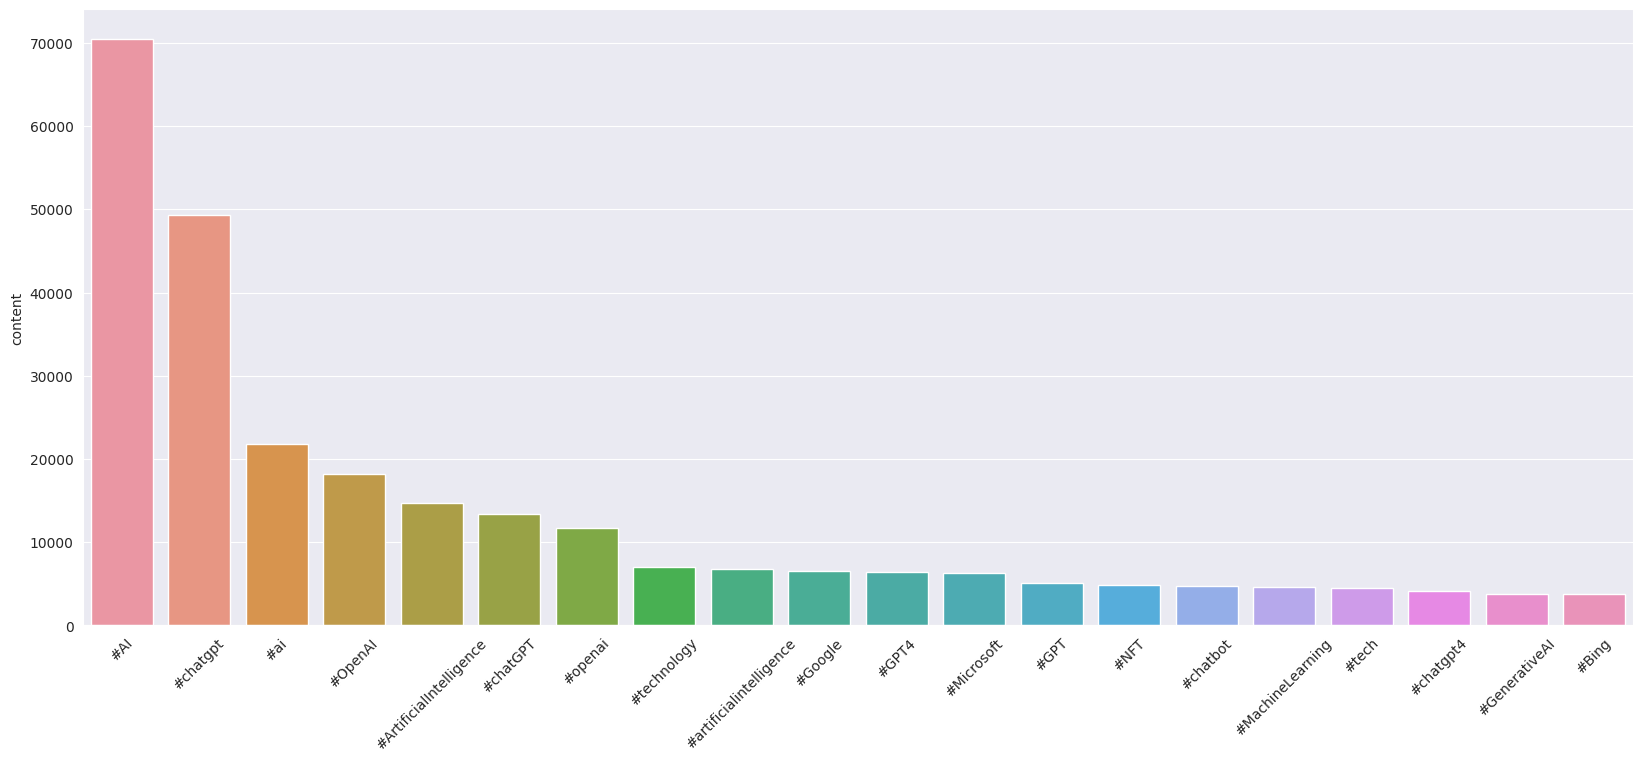

In [41]:
# Static plot

# Most active users, most used hashtags, and mentions
plt.figure(figsize=(20, 8))
hashtags = df['content'].str.findall(r'#\w+')
hashtags_count = hashtags.explode().value_counts()
sns.barplot(x=hashtags_count.index[1:21], y=hashtags_count[1:21])
plt.xticks(rotation=45)
plt.show()

In [43]:
# # Most mentioned users
# mentions = df['content'].str.findall(r'@\w+')
# mentions_count = mentions.explode().value_counts()
# fig_mentions = px.bar(x=mentions_count.index[:20], y=mentions_count[:20], title='Top 20 Mentions', color=mentions_count[:20])
# fig_mentions.update_xaxes(tickangle=45)
# fig_mentions.update_layout(width=1200, height=800)
# fig_mentions.show()

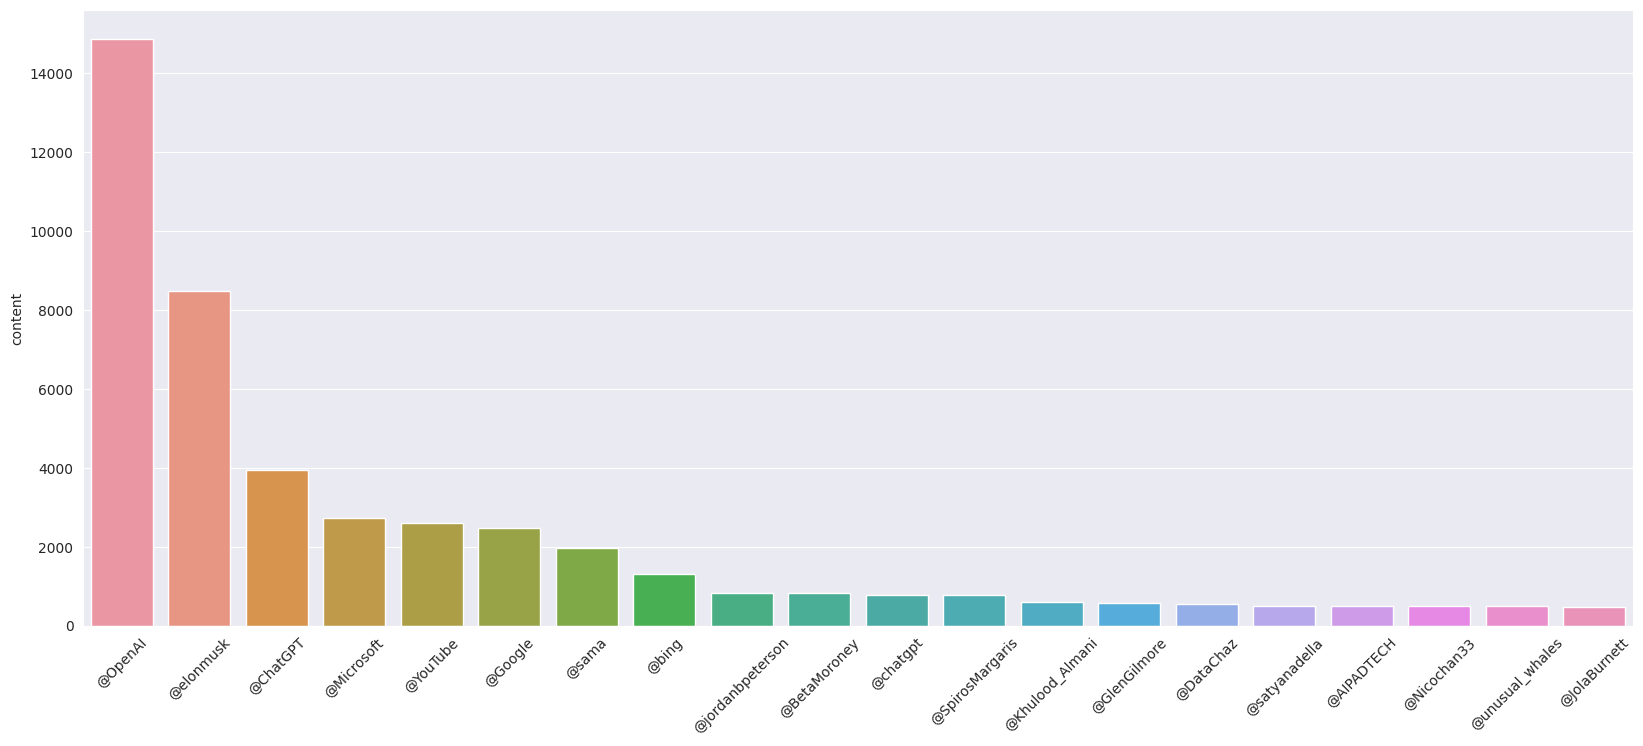

In [45]:
# Static plot

plt.figure(figsize=(20, 8))
mentions = df['content'].str.findall(r'@\w+')
mentions_count = mentions.explode().value_counts()
sns.barplot(x=mentions_count.index[:20], y=mentions_count[:20])
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

Index(['date', 'id', 'content', 'username', 'like_count', 'retweet_count',
       'processed_content'],
      dtype='object')

In [48]:
# # Most active users by tweet volume
# tweets_by_user = df.groupby('username').size().sort_values(ascending=False)
# fig_users = px.bar(y=tweets_by_user.index[:20], x=tweets_by_user[:20], title='Top 20 Active Users', orientation='h', color=tweets_by_user[:20])
# fig_users.update_layout(width=1200, height=800)
# fig_users.show()

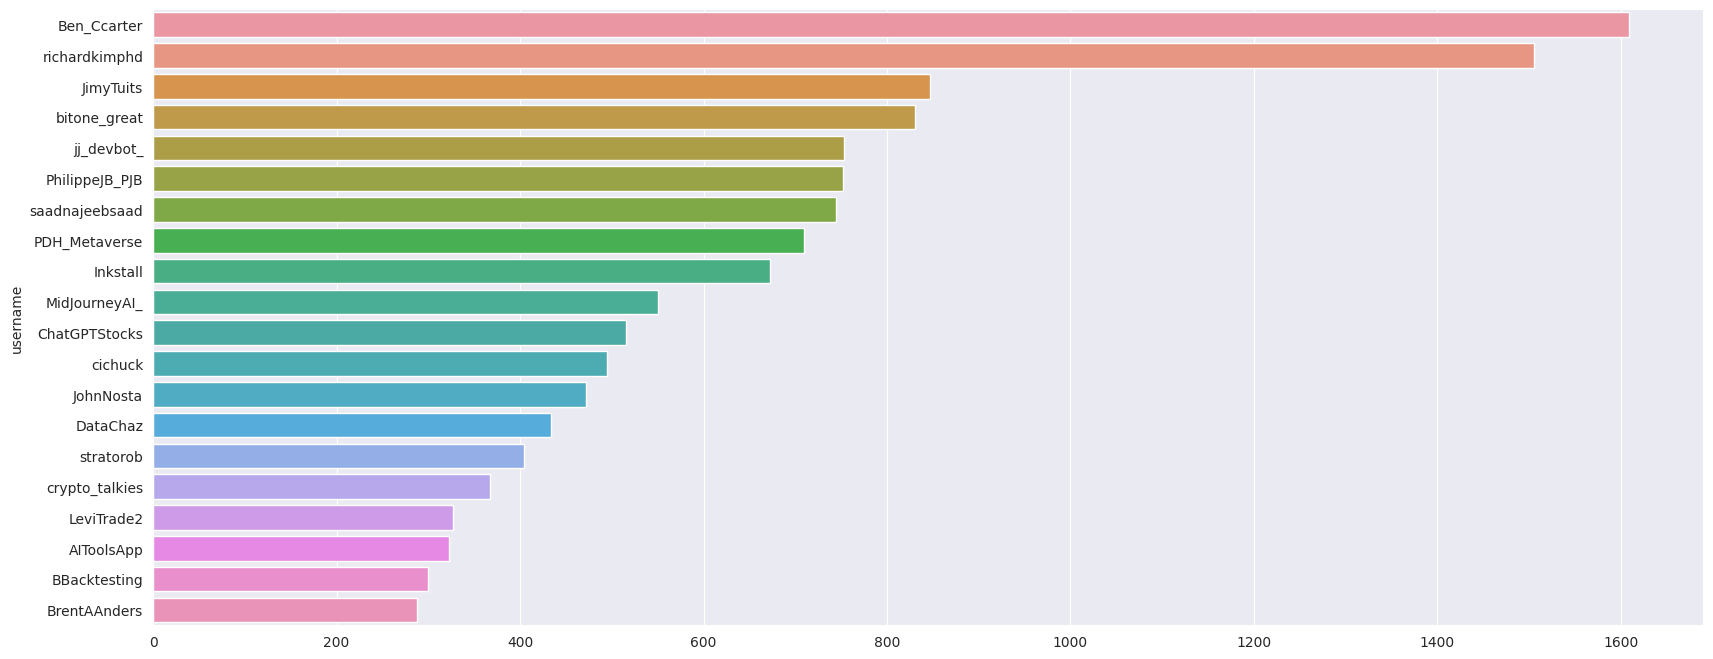

In [47]:
# Static plot

plt.figure(figsize=(20, 8))
tweets_by_user = df.groupby('username').size().sort_values(ascending=False)
sns.barplot(x=tweets_by_user[:20], y=tweets_by_user[:20].index)
plt.show()

## **8.3 EDA 3 - Most liked tweets && Most Influential Users**



In [49]:
# Most liked tweets
df.sort_values(by='like_count', ascending=False)[['date','like_count','username','content']][1:12]

date  like_count         username  \
458850 2023-01-13     63835.0       johnvianny   
164991 2023-03-06     44940.0             rgay   
487957 2023-01-07     42125.0        aaronsiim   
463662 2023-01-12     38278.0  kevinschawinski   
434201 2023-01-18     37048.0  writingtoriches   
5121   2023-03-29     28049.0        ProudFede   
123398 2023-03-14     22310.0             sama   
472002 2023-01-10     21476.0      AlexHormozi   
98971  2023-03-16     20827.0       lexfridman   
31713  2023-03-25     19462.0       lexfridman   
211091 2023-02-24     19405.0     nocontextfm1   

                                                  content  
458850  Best AI Tools You Need To Know\n#chatgpt #chat...  
164991  I am pretty sure I am reading my first CHAT GP...  
487957  ultra-modern generative ai🗨️: \n\n• AI2\n• AI2...  
463662  First #ChatGPT answer which made me pause. htt...  
434201  AI copywriting tools to check out:\n\n1. Chat ...  
5121    Chat GPT reveals “The Best 11 Of All Time” htt...  
123398  here is GPT-4, our most capable and aligned mo...  
472002  This is a frightening visual for me. \n\nThe f...  
98971   I'm doing podcast with Sam Altman (@sama), CEO...  
31713   Here's my conversation with Sam Altman (@sama)...  
211091  Chat GPT was asked to build a dominant tactic ...

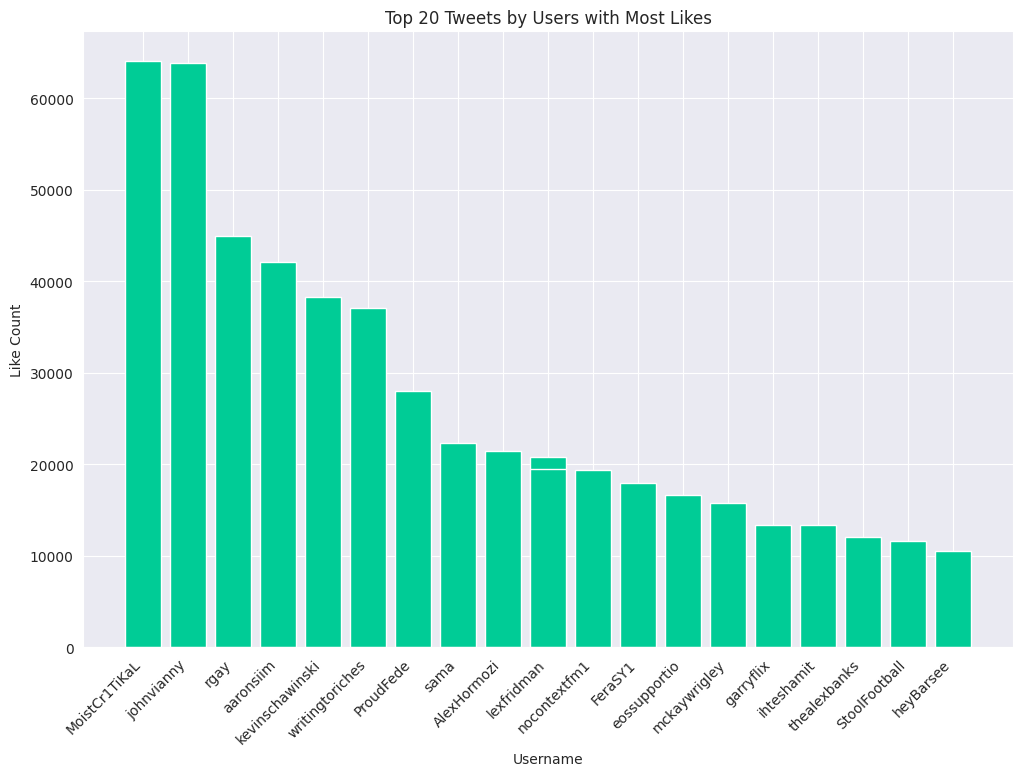

In [52]:
# Plotting users with most liked tweets
most_liked_tweets = df.sort_values(by='like_count', ascending=False).head(20)

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(most_liked_tweets['username'], most_liked_tweets['like_count'], color='#00CC96')

# Add labels and title
plt.xlabel('Username')
plt.ylabel('Like Count')
plt.title('Top 20 Tweets by Users with Most Likes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [53]:
# # Plotting users with most liked tweets

# most_liked_tweets = df.sort_values(by='like_count', ascending=False).head(20)

# fig_most_liked = px.bar(most_liked_tweets, x='username', y='like_count', text='like_count', 
#                         title='Top 20 Tweets by users with Most Likes',
#                         color_discrete_sequence=['#00CC96'],
#                         width=1200, height=800)
# fig_most_liked.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig_most_liked.show()

The power users! Most influential users by total number of tweet likes and retweets 

In [ ]:
# users with highest total tweet likes


# Group by 'username' and sum the 'like_count' for each user
user_likes = df.groupby('username')['like_count'].sum().reset_index()
# Sort the DataFrame by total likes in descending order
user_likes_sorted = user_likes.sort_values(by='like_count', ascending=False)
# Top 10 most influential users by likes
user_likes_sorted.head(10)

username  like_count
29404          DataChaz    122714.0
72788     MoistCr1TiKaL     64094.0
173027       johnvianny     63876.0
206761             rgay     44940.0
121632        aaronsiim     42934.0
180626       lexfridman     40289.0
234023  writingtoriches     39425.0
176791  kevinschawinski     38320.0
39709       FirstWeekHQ     33114.0
85792         ProudFede     28049.0

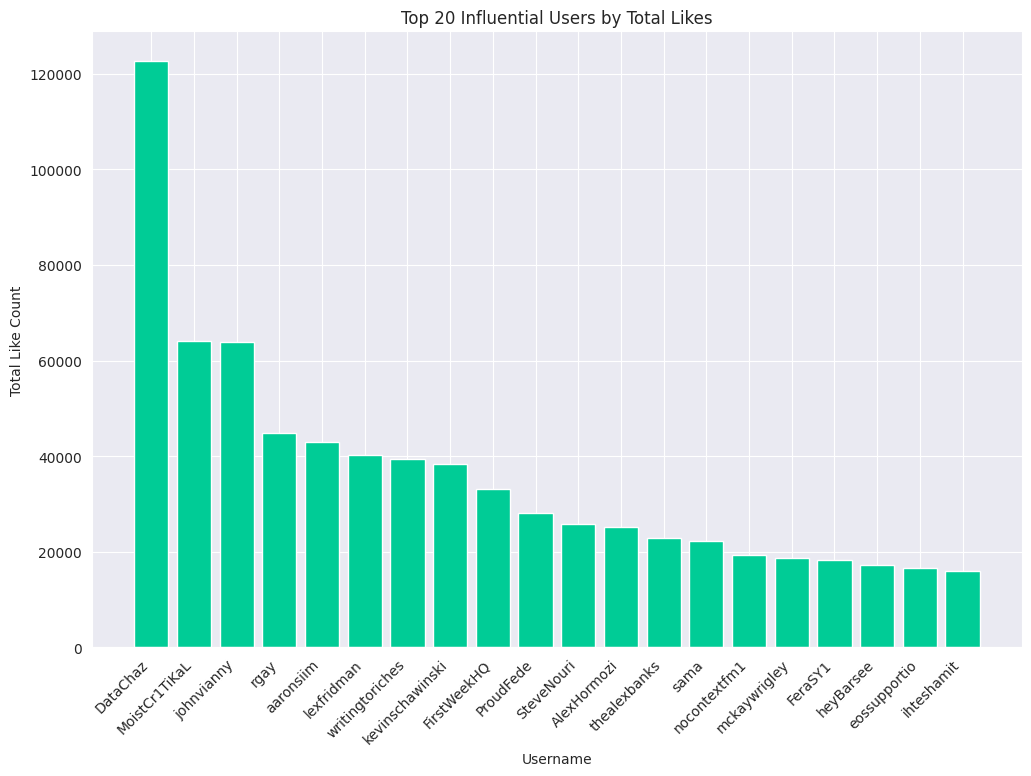

In [54]:


# Plotting users with highest total tweet likes
user_likes = df.groupby('username')['like_count'].sum().reset_index()
user_likes_sorted = user_likes.sort_values(by='like_count', ascending=False).head(20)

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(user_likes_sorted['username'], user_likes_sorted['like_count'], color='#00CC96')

# Add labels and title
plt.xlabel('Username')
plt.ylabel('Total Like Count')
plt.title('Top 20 Influential Users by Total Likes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()


In [55]:
# # plotting users with highest total tweet likes


# user_likes = df.groupby('username')['like_count'].sum().reset_index()
# user_likes_sorted = user_likes.sort_values(by='like_count', ascending=False).head(20)

# fig_likes = px.bar(user_likes_sorted, x='username', y='like_count', text='like_count', title='Top 20 Influential Users by Total Likes', 
#                    color_discrete_sequence=['#00CC96'],width=1200, height=800)
# fig_likes.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig_likes.show()

In [ ]:
# users with highest total retweets


# Group by 'username' and sum the 'retweet_count' for each user
user_tweets = df.groupby('username')['retweet_count'].sum().reset_index()
# Sort the DataFrame by total likes in descending order
user_tweets_sorted = user_tweets.sort_values(by='retweet_count', ascending=False)
# Top 10 most influential users by retweets
user_tweets_sorted.head(10)

username  retweet_count
29404          DataChaz        25732.0
173027       johnvianny        16096.0
121632        aaronsiim        11710.0
234023  writingtoriches        10712.0
157517        garryflix         8194.0
142718     crypto_bearr         8060.0
106848   TheRavenCrypto         5429.0
32471     Dmailofficial         5114.0
168099         ispolink         4849.0
154021       eyishazyer         4762.0

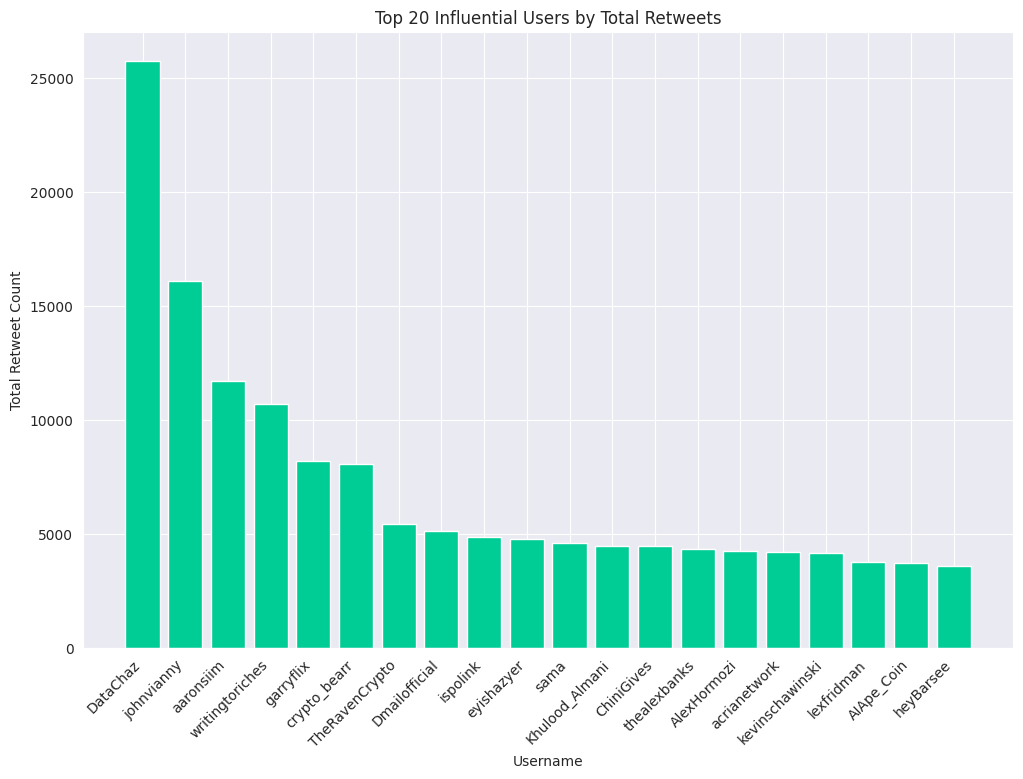

In [60]:
# Plotting users with highest total tweet retweets
user_retweets = df.groupby('username')['retweet_count'].sum().reset_index()
user_retweets_sorted = user_retweets.sort_values(by='retweet_count', ascending=False).head(20)

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(user_retweets_sorted['username'], user_retweets_sorted['retweet_count'], color='#00CC96')

# Add labels and title
plt.xlabel('Username')
plt.ylabel('Total Retweet Count')
plt.title('Top 20 Influential Users by Total Retweets')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()


In [61]:
# user_tweets = df.groupby('username')['retweet_count'].sum().reset_index()
# user_tweets_sorted = user_tweets.sort_values(by='retweet_count', ascending=False).head(20)

# fig_retweets = px.bar(user_tweets_sorted, x='username', y='retweet_count', text='retweet_count', title='Top 20 Influential Users by Total Retweets',
#                       color_discrete_sequence=['#00CC96'],width=1200, height=800)
# fig_retweets.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig_retweets.show()


## **9. Stock impacts from major AI developments**





MICROSOFT (major investor in OpenAI) 

GOOGLE (BARD - Major Competitor to ChatGPT by OpenAI)

META (Competitior)

NVIDIA (Nvidia GPUs used by Microsoft which helped OpenAI train ChatGPT)

In [56]:
# get stock data for Microsoft, Google, Amazon, Meta, Nvidia, and IBM.
start_date = '2023-01-04'
end_date = '2023-03-29'
ticker_symbols = ['MSFT', 'GOOGL', 'AMZN', 'META', 'NVDA', 'IBM'] 
stocks_df = yf.download(ticker_symbols, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [57]:
# number of tweets per day
tweets_by_day = df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index()
tweets_by_day.columns = ['date', 'count']

In [59]:


# # create a combined plot
# fig = go.Figure()

# # add tweet count trace
# fig.add_trace(go.Bar(x=tweets_by_day['date'], y=tweets_by_day['count'], name='Tweet Count', opacity=0.5))

# # add stock price traces
# for symbol in ticker_symbols:
#     fig.add_trace(go.Scatter(x=stocks_df.index, y=stocks_df[symbol], name=symbol, yaxis='y2'))

# # customize the layout
# fig.update_layout(
#     title='Stock Prices and Tweet Counts',
#     xaxis=dict(title='Date', tickangle=45, tickformat='%Y-%m-%d'),
#     yaxis=dict(title='Tweet Count', side='left'),
#     yaxis2=dict(title='Stock Price', side='right', overlaying='y1', position=0.95),
#     width=1200, height=800
# )
# fig.show()

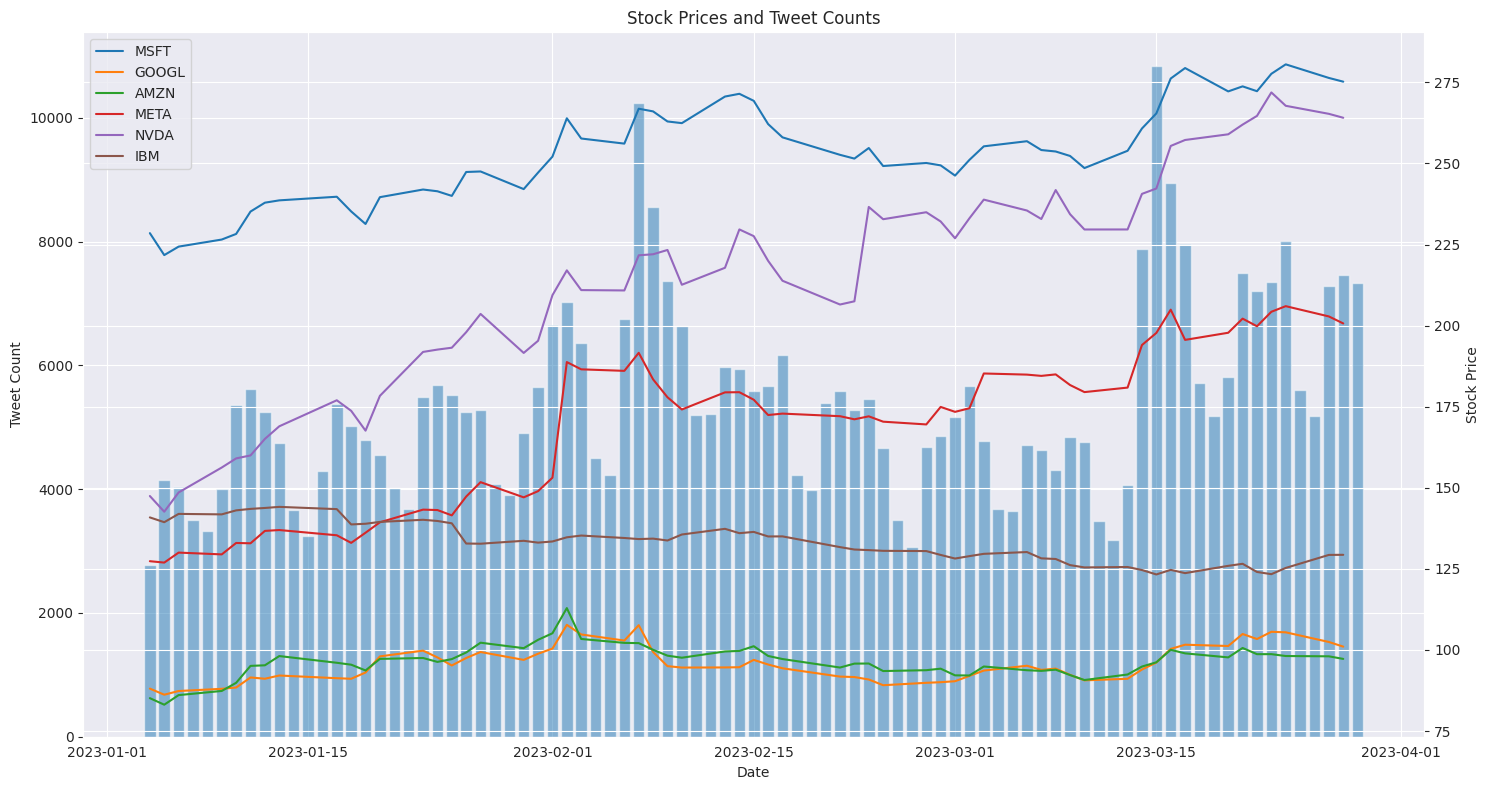

In [58]:
# Static Plot

import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(15, 8))

# plot tweet counts
ax1.bar(tweets_by_day['date'], tweets_by_day['count'], alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Tweet Count')
ax1.tick_params(axis='x')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# plot stock prices
ax2 = ax1.twinx()
for symbol in ticker_symbols:
    ax2.plot(stocks_df.index, stocks_df[symbol], label=symbol)
ax2.set_ylabel('Stock Price')
ax2.legend(loc='upper left')

plt.title('Stock Prices and Tweet Counts')
plt.tight_layout()
plt.show()


2 Major dates:

1.   **Feb 7 2023 (Google BARD released)**

*   Microsoft & Nvidia **⤴** 
*   Meta (Facebook) **↘**
*   Google (BARD complications) **↘**
*   Amazon, IBM **➖**

2.   **Mar 14 2023 (GPT 4 released)**

*   Microsoft & Nvidia **⤴** 
*   Meta (Facebook) **⤴↘➖**
*   Google, Amazon, IBM **➖**




---



---



---






## **10.1 Text Analysis - Top Bigrams and Trigrams**



In [62]:
# df backup point before dropping irrelevant rows for further analysis
df_backup1 = df.copy(deep = True)

In [63]:
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  \
0         0.0            0.0   

                                   processed_content  
0  free ai marketing and automation tools, strate...

In [64]:
len(df)

458210

In [65]:
df.columns

Index(['date', 'id', 'content', 'username', 'like_count', 'retweet_count',
       'processed_content'],
      dtype='object')

In [76]:
# a function to get n-grams
def get_top_n_ngrams(corpus, n=None, ngram=2):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [67]:
# Get top 20 bigrams
common_bigrams = get_top_n_ngrams(df['processed_content'], 20, ngram=2)

# Get top 20 trigrams
common_trigrams = get_top_n_ngrams(df['processed_content'], 20, ngram=3)

In [78]:
# converting the list to dataframe
df_bigrams = pd.DataFrame(common_bigrams, columns=['NgramText', 'count'])
df_trigrams = pd.DataFrame(common_trigrams, columns=['NgramText', 'count'])

In [81]:
# # Plot bigrams
# fig_bigrams = px.bar(df_bigrams[1:], x='NgramText', y='count', title='Bigram Counts', color = 'count',width=1200, height=800)
# fig_bigrams.show()

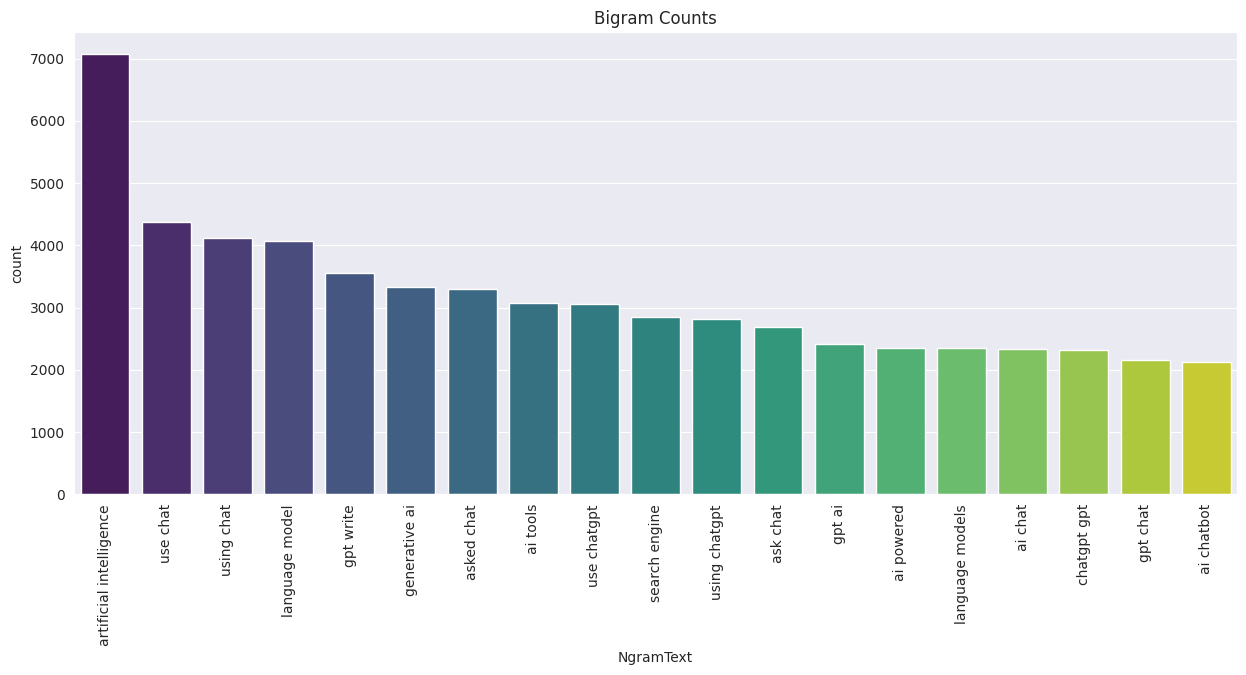

In [80]:
# Static

plt.figure(figsize=(15, 6))
sns.barplot(data=df_bigrams[1:], x='NgramText', y='count', palette='viridis')
plt.title('Bigram Counts')
plt.xticks(rotation=90)
plt.show()


In [70]:
# # Plot trigrams
# fig_trigrams = px.bar(df_trigrams, x='NgramText', y='count', title='Trigram Counts', color = 'count',width=1200, height=800)
# fig_trigrams.show()

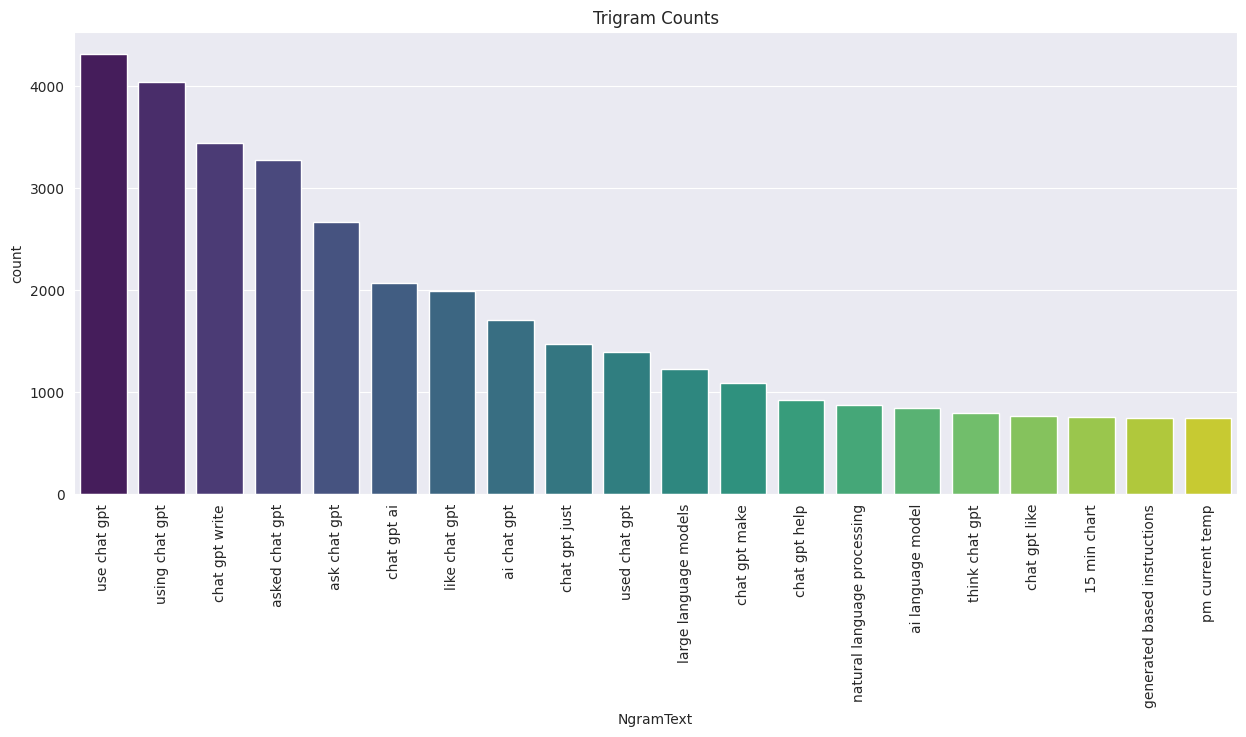

In [71]:
# Static

plt.figure(figsize=(15, 6))
sns.barplot(data=df_trigrams, x='NgramText', y='count', palette='viridis')
plt.title('Trigram Counts')
plt.xticks(rotation=90)
plt.show()


**REFINED BIGRAMS AND TRIGRAMS**

**We'll exclude 'chat', 'gpt', 'chatgpt' from n-grams to get better results focusing on other aspects related to ChatGPT**

In [72]:
# modified function to exclude certain keywords from the ngrams
def get_top_n_ngrams(corpus, n=None, ngram=2, exclude_keywords=None):
    if exclude_keywords is None:
        exclude_keywords = []
        
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Exclude n-grams containing specified keywords
    words_freq = [item for item in words_freq if not any(keyword in item[0] for keyword in exclude_keywords)]

    return words_freq[:n]

# Get top 20 bigrams
common_bigrams = get_top_n_ngrams(df['processed_content'], 20, ngram=2, exclude_keywords=['chat', 'gpt', 'chatgpt'])

# Get top 20 trigrams
common_trigrams = get_top_n_ngrams(df['processed_content'], 20, ngram=3, exclude_keywords=['chat', 'gpt', 'chatgpt'])

# converting the list to dataframe
df_bigrams = pd.DataFrame(common_bigrams, columns=['NgramText', 'count'])
df_trigrams = pd.DataFrame(common_trigrams, columns=['NgramText', 'count'])

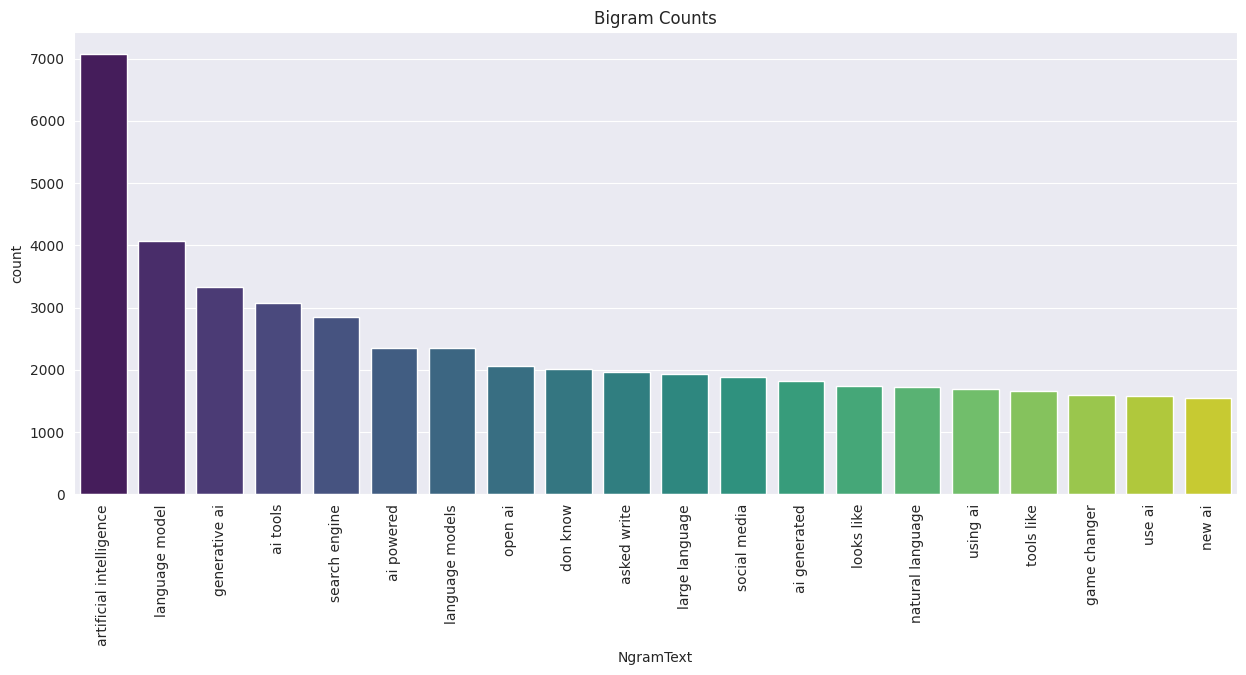

In [73]:
# Static

plt.figure(figsize=(15, 6))
sns.barplot(data=df_bigrams, x='NgramText', y='count', palette='viridis')
plt.title('Bigram Counts')
plt.xticks(rotation=90)
plt.show()

In [82]:
# # Plot bigrams
# fig_bigrams = px.bar(df_bigrams, x='NgramText', y='count', title='Bigram Counts', color='count', width=1200, height=800)
# fig_bigrams.show()

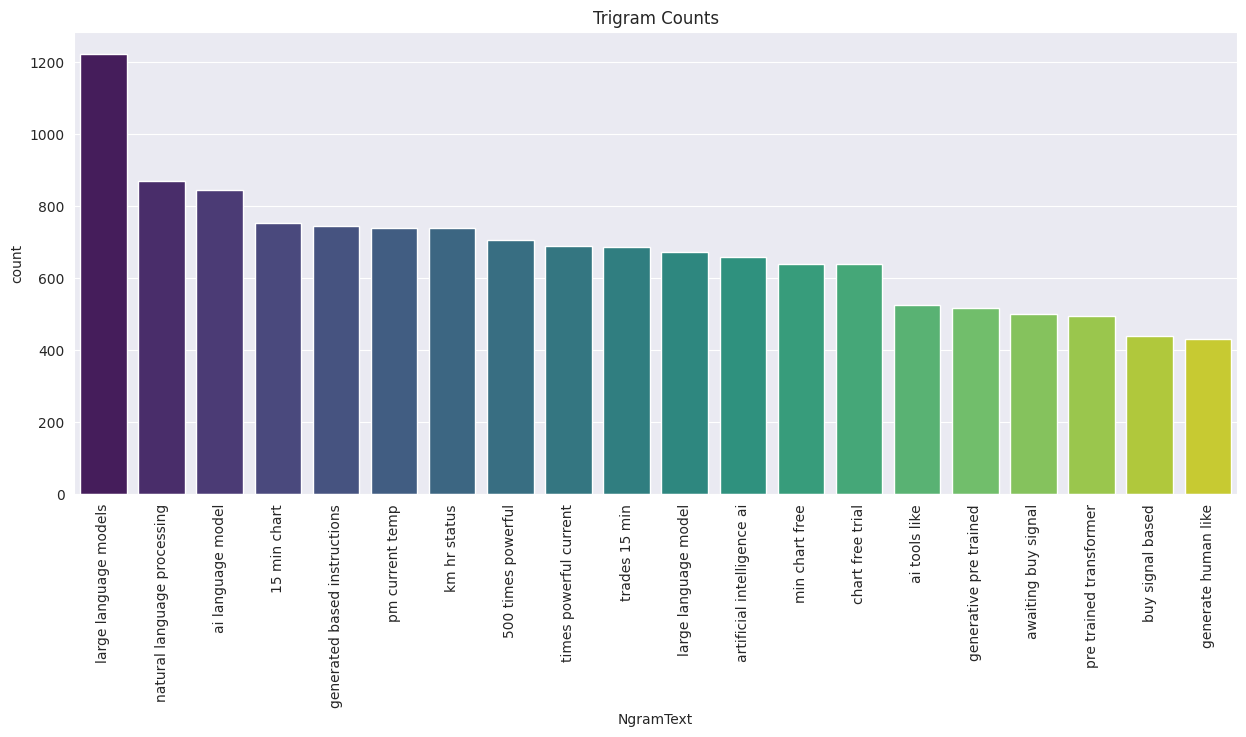

In [74]:
# Static

plt.figure(figsize=(15, 6))
sns.barplot(data=df_trigrams, x='NgramText', y='count', palette='viridis')
plt.title('Trigram Counts')
plt.xticks(rotation=90)
plt.show()

In [83]:
# # Plot trigrams
# fig_trigrams = px.bar(df_trigrams, x='NgramText', y='count', title='Trigram Counts', color='count', width=1200, height=800)
# fig_trigrams.show()

## **10.2 WordClouds**

### 10.2.1 Lemmatize

In [ ]:
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  \
0         0.0            0.0   

                                   processed_content  
0  free ai marketing and automation tools, strate...

In [ ]:
# Initialize the lemmatizer
wordnet_lem = WordNetLemmatizer()

# Lemmatize processed text and join everything in a list
df['content_lem'] = df['processed_content'].apply(wordnet_lem.lemmatize)
all_words_lem = ' '.join([word for word in df['content_lem']])

In [ ]:
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  \
0         0.0            0.0   

                                   processed_content  \
0  free ai marketing and automation tools, strate...   

                                         content_lem  
0  free ai marketing and automation tools, strate...

### 10.2.2 Unigram Wordcloud

In [ ]:
from random import choice

# Define a custom color function for Wordcloud
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#1DA1F2', '#00CC96', '#FF5733', '#FFC300', '#E91E63', '#9C27B0', '#673AB7']
    return choice(colors)

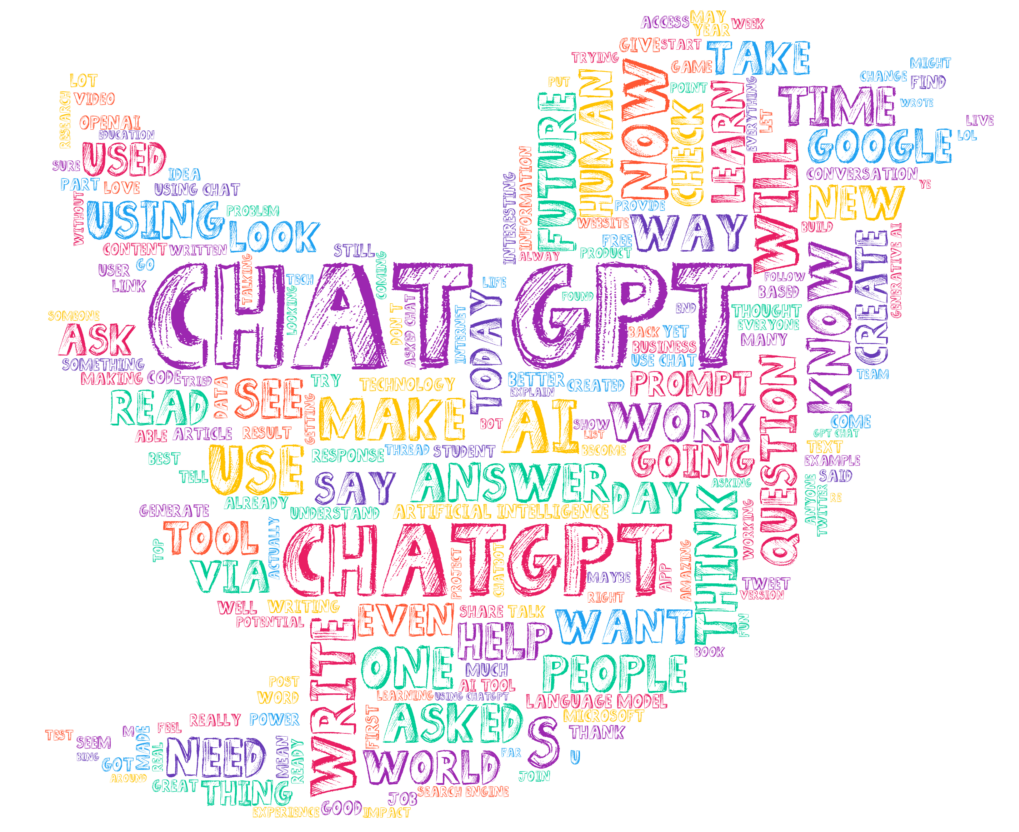

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("/content/twitter_logo1.jpg"))
stopwords = set(STOPWORDS)

wordcloud_twitter = WordCloud(height=2000, width=2000,
                              background_color="white", mode="RGBA",
                              stopwords=stopwords, mask=mask, color_func=custom_color_func,
                              font_path='/content/SketchBook-B5pB.ttf').generate(all_words_lem)

# Create coloring from custom color function we defined earlier
plt.figure(figsize=[10, 10])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter.recolor(color_func=custom_color_func), interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_unigram.png", format="png")

plt.show()

### 10.2.3 Mentions Wordcloud

In [ ]:
# Extract mentions and concatenate all mentions in one string
all_mentions = ' '.join([mention[1:] for mentions in df['content'].str.findall(r'@\w+') for mention in mentions])

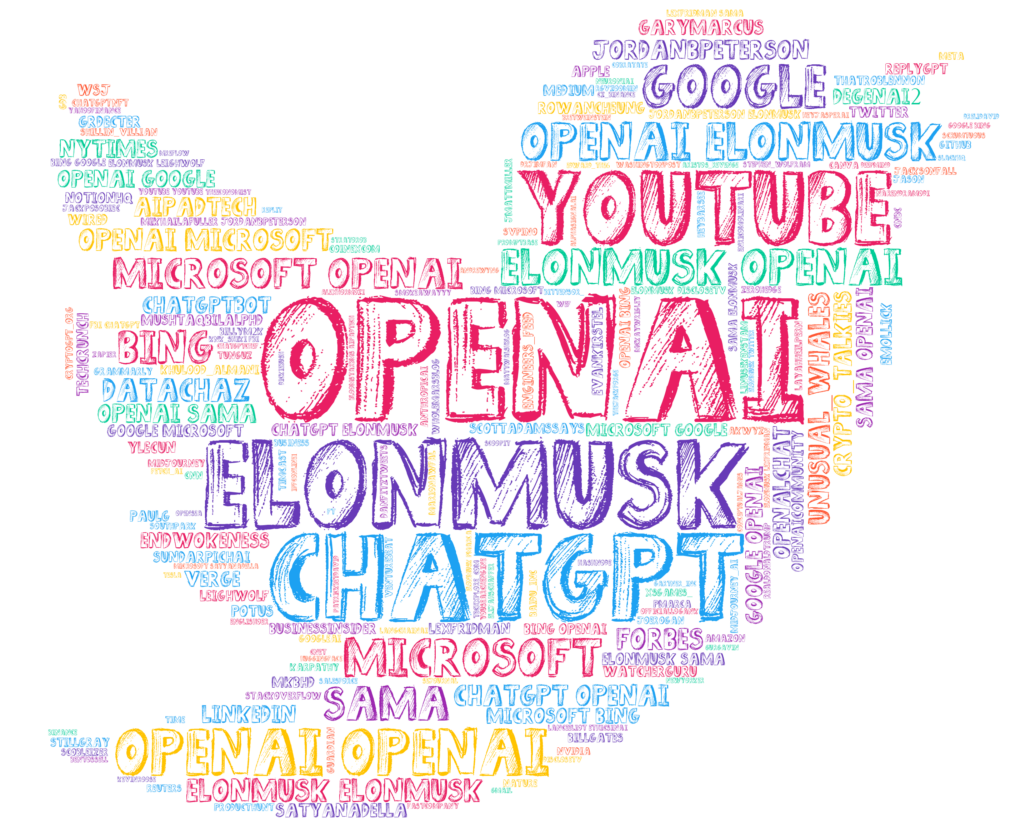

In [ ]:
# Generate a word cloud image
wordcloud_twitter = WordCloud(height=2000, width=2000,
                              background_color="white", mode="RGBA",
                              stopwords=stopwords, mask=mask, color_func=custom_color_func,
                              font_path='/content/SketchBook-B5pB.ttf').generate(all_mentions)

# Create coloring from custom color function we defined earlier
plt.figure(figsize=[10,10])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter.recolor(color_func=custom_color_func), interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_logo_unigram_mentions.png", format="png")

plt.show()

### 10.2.4 Hashtag Wordcloud

In [ ]:
# Extract hashtags and concatenate all hashtags in one string
all_hashtags = ' '.join([hashtag[1:] for hashtags in df['content'].str.findall(r'#\w+') for hashtag in hashtags])

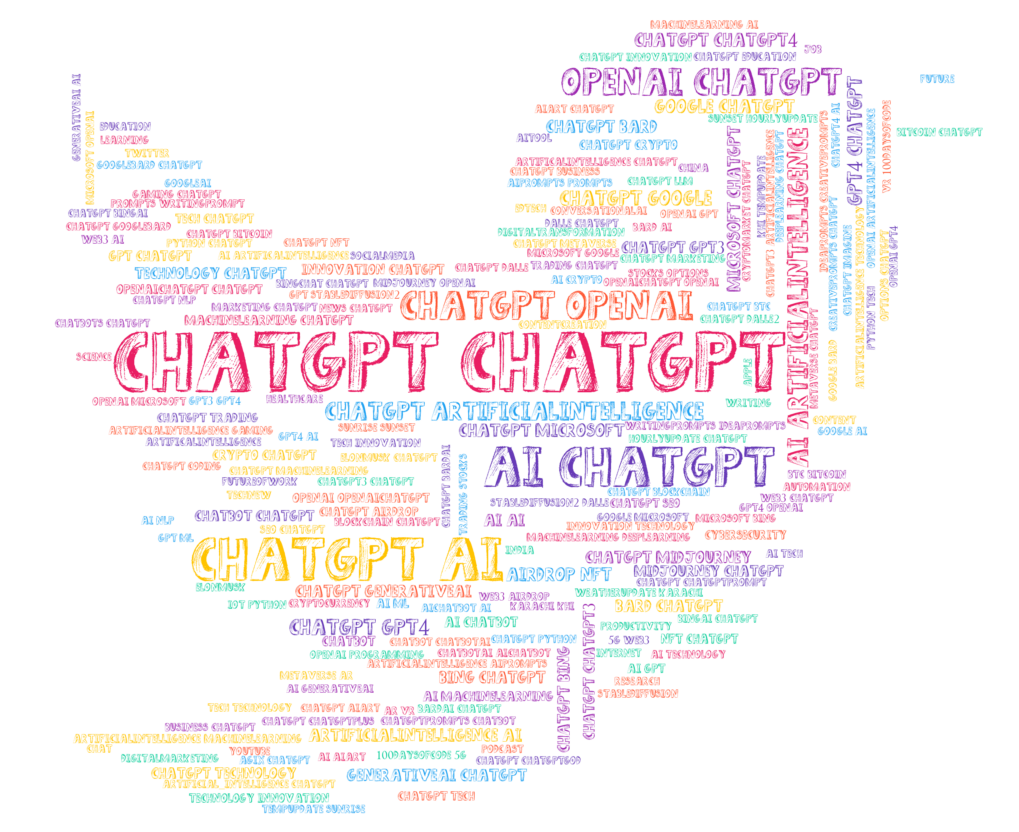

In [ ]:
# Generate a word cloud image
wordcloud_twitter = WordCloud(height=2000, width=2000,
                              background_color="white", mode="RGBA",
                              stopwords=stopwords, mask=mask, color_func=custom_color_func,
                              font_path='/content/SketchBook-B5pB.ttf').generate(all_hashtags)

# Create coloring from custom color function we defined earlier
plt.figure(figsize=[10,10])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter.recolor(color_func=custom_color_func), interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_logo_unigram_hashtags.png", format="png")

plt.show()

## **11. Sentiment Analysis**

### 11.1 Overall Sentiment

In [84]:
# calculate vader polarity from the preprocessed content

from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df['vader_polarity'] = df['processed_content'].map(lambda text: sid.polarity_scores(text)['compound']) 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [85]:
# calculate TextBlob polarity from the preprocessed content

from textblob import TextBlob

df['blob_polarity'] = df['processed_content'].map(lambda text: TextBlob(text).sentiment.polarity)

In [86]:
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  \
0         0.0            0.0   

                                   processed_content  vader_polarity  \
0  free ai marketing and automation tools, strate...          0.5106   

   blob_polarity  
0       0.268182

In [87]:
# Creating a dataframe combining both calculated polarities

polarity_df = df[['vader_polarity', 'blob_polarity']]
polarity_df = polarity_df.rename(columns={'vader_polarity': 'Vader','blob_polarity': 'TextBlob'})

In [95]:
# # Creating a histogram to compare the polarities of both the methods

# fig = px.histogram(polarity_df, x=['Vader', 'TextBlob'], nbins=40, barmode='group', color_discrete_sequence=['#1DA1F2', '#00CC96'])
# fig.update_layout(title='Distributions of sentimental polarities Vader Vs. TextBlob', xaxis_title='Polarity', yaxis_title='Count',width=1200, height=800)
# fig.show()

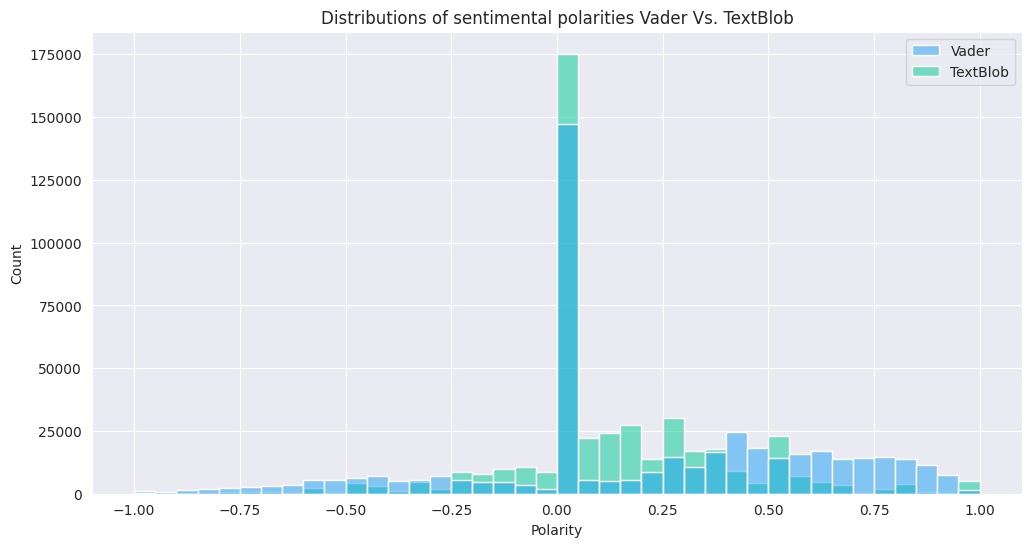

In [88]:
# Static Plot

plt.figure(figsize=(12, 6))
sns.histplot(data=polarity_df, bins=40, kde=False, alpha=0.5, palette=['#1DA1F2', '#00CC96'])
plt.title('Distributions of sentimental polarities Vader Vs. TextBlob')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()


### 11.2 Topic Sentiment

In [89]:
# We'll remove stop words to filter out the unnecessary content

stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

df['stop_content'] = df['processed_content'].apply(lambda x: remove_stop_words(x))

In [90]:
# We define a list of topics
topics = ['ai', 'chatgpt', 'elonmusk', 'openai', 'google', 'sama', 'microsoft' ,'youtube', 'billgates', 'linkedin', 'bing', 'midjourney']

# We create a new column Topic
df['Topic'] = ""
for topic in topics:
    df.loc[df['stop_content'].str.contains(topic), 'Topic'] = topic

# We create a new DataFrame with columns topic / sentiment / source
data = []
for topic in topics:
    topic_rows = df[df['Topic'] == topic]
    # Average sentiment per topic
    vader_sentiments = topic_rows['vader_polarity'].sum() / topic_rows.shape[0]
    textblob_sentiments = topic_rows['blob_polarity'].sum() / topic_rows.shape[0]
    # Append data
    data.append({'Topic': topic, 'Sentiment': vader_sentiments, 'Source': 'Vader'})
    data.append({'Topic': topic, 'Sentiment': textblob_sentiments, 'Source': 'TextBlob'})

df_new = pd.DataFrame(data)

In [96]:
# # Plot the sentiment for each topic
# fig = px.bar(df_new,x='Topic',y='Sentiment',color='Source',barmode='group',color_discrete_sequence = ['#1DA1F2', '#00CC96'],
#              title='Comparative sentimental analysis by topic',template='plotly_white',width=1200, height=800)
# fig.show()

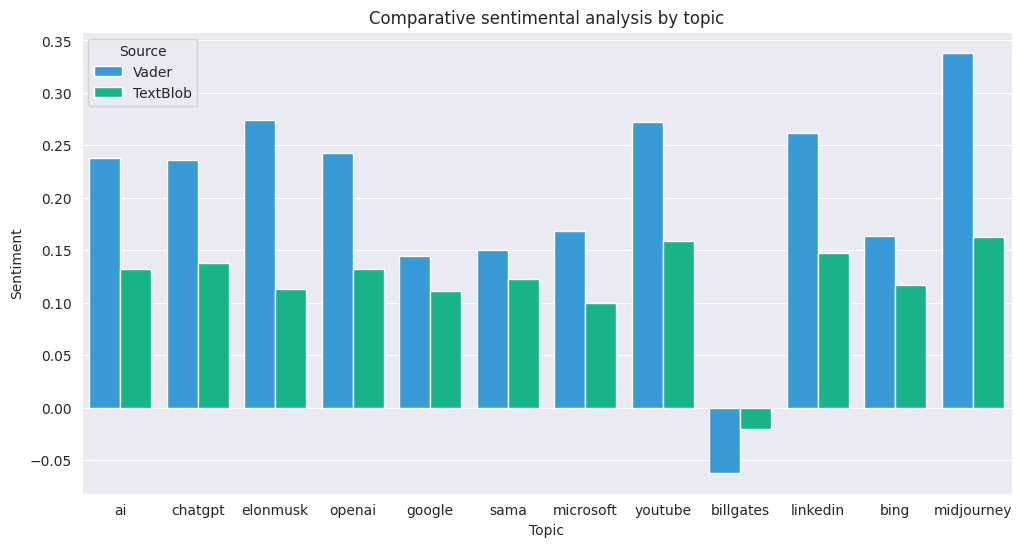

In [91]:
# Static Plot

plt.figure(figsize=(12, 6))
sns.barplot(data=df_new, x='Topic', y='Sentiment', hue='Source', palette=['#1DA1F2', '#00CC96'])
plt.title('Comparative sentimental analysis by topic')
plt.xlabel('Topic')
plt.ylabel('Sentiment')
plt.legend(title='Source')
plt.show()


### 11.3 Mention Sentiment

In [92]:
df.columns

Index(['date', 'id', 'content', 'username', 'like_count', 'retweet_count',
       'processed_content', 'vader_polarity', 'blob_polarity', 'stop_content',
       'Topic'],
      dtype='object')

In [93]:
# Extract top 20 mentions
mentions = df['content'].str.findall(r'@\w+')
mentions_count = mentions.explode().value_counts()
top_mentions = mentions_count[:20].index.tolist()

vader_sentiments = df['vader_polarity'].tolist()
textblob_sentiments = df['blob_polarity'].tolist()
text = df['content'].tolist()

# Create a new column for the username
df['Mention'] = ""
for mention in top_mentions:
    df.loc[df['content'].str.contains(mention), 'Mention'] = mention

# Create a new dataframe with columns for username, sentiment, and sentiment source
data = []
for mention in top_mentions:
    mention_rows = df[df['Mention'] == mention]
    vader_sentiments = mention_rows['vader_polarity'].sum() / mention_rows.shape[0]
    textblob_sentiments = mention_rows['blob_polarity'].sum() / mention_rows.shape[0]
    data.append({'Mention': mention, 'Sentiment': vader_sentiments, 'Source': 'Vader'})
    data.append({'Mention': mention, 'Sentiment': textblob_sentiments, 'Source': 'TextBlob'})
df_new = pd.DataFrame(data)


In [97]:
# # plot the sentiment for each username using Plotly
# fig = px.bar(df_new,x='Mention',y='Sentiment',color='Source',barmode='group',color_discrete_sequence = ['#1DA1F2', '#00CC96'],
#              title='Comparative sentimental analysis by accounts',template='plotly_white',width=1500, height=800)
# fig.show()

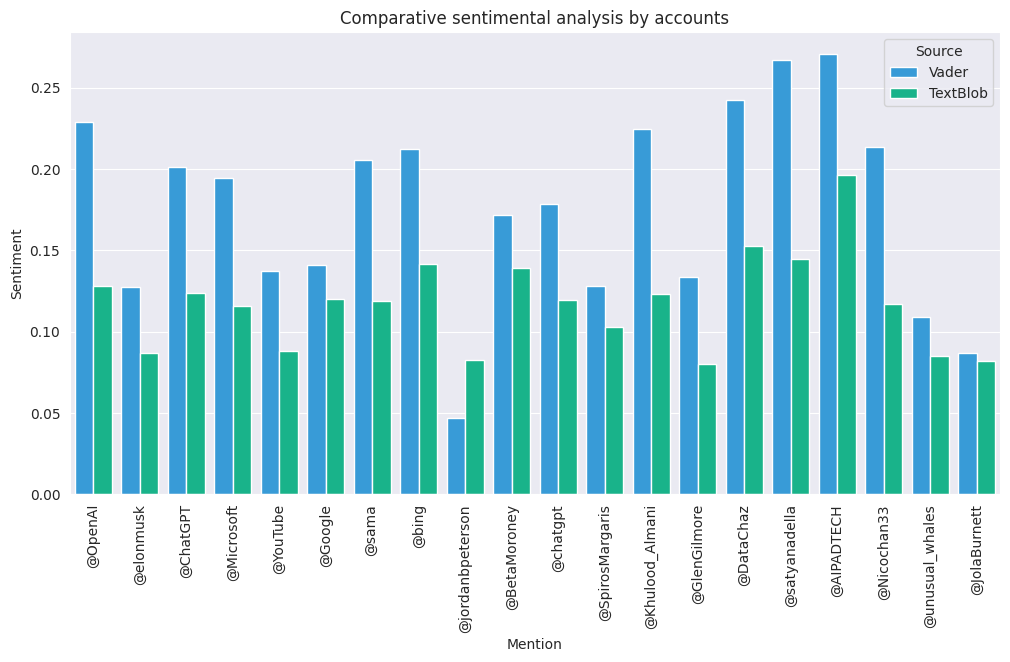

In [94]:
# Static

plt.figure(figsize=(12, 6))
sns.barplot(data=df_new, x='Mention', y='Sentiment', hue='Source', palette=['#1DA1F2', '#00CC96'])
plt.title('Comparative sentimental analysis by accounts')
plt.xlabel('Mention')
plt.ylabel('Sentiment')
plt.legend(title='Source')
plt.xticks(rotation=90)
plt.show()

## **12. Conclusion**

**And we are done!** Congratulations on finishing the project, and thanks for sticking around till the end.
